In [ ]:
import tensorflow as tf
import  os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/newFire/imageToTry' /content/

In [ ]:
loaded_model = tf.keras.models.load_model('fire_model.h5')

In [ ]:
folder_path = '/content/imageToTry'
image_paths = []
for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        image_paths.append(folder_path +'/'+ filename)

image_paths

['/content/imageToTry/4.jpg',
 '/content/imageToTry/79.jpg',
 '/content/imageToTry/445.jpg',
 '/content/imageToTry/52HYZDV7D22S.jpg',
 '/content/imageToTry/54RZ9YOGWZPM.jpg',
 '/content/imageToTry/50YI0NEQ2NF2.jpg',
 '/content/imageToTry/446.jpg',
 '/content/imageToTry/10.jpg',
 '/content/imageToTry/447.jpg']

In [ ]:
input_width, input_height = 224, 224
images = []

# Load and resize the images
for image_path in image_paths:
    image = load_img(image_path, target_size=(input_width, input_height))
    images.append(img_to_array(image))

input_data = tf.convert_to_tensor(images)

In [ ]:
predictions = loaded_model.predict(input_data)

1/1 [==============================] - 1s 713ms/step


False 0.9995009
False 0.9992022
True 0.5064711
True 0.9999974
True 0.9999976
True 0.99999785
False 0.9974995
False 0.9995449
False 0.9706442


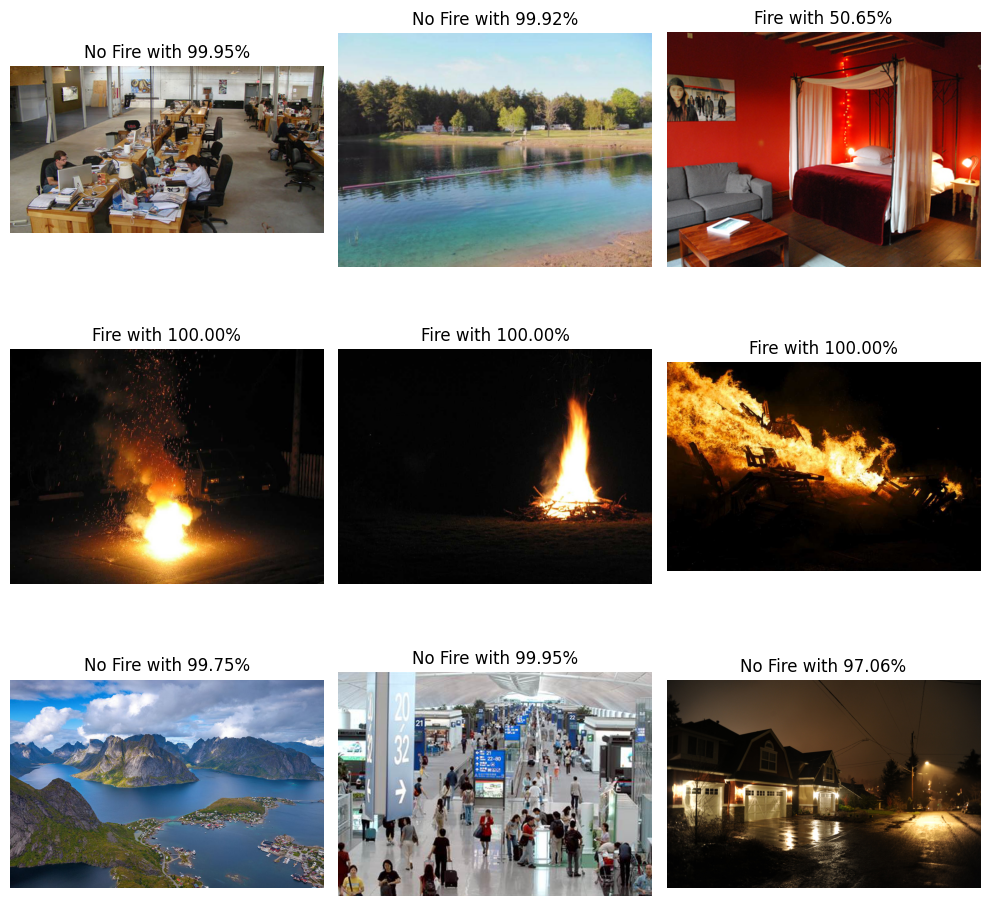

In [ ]:
true_image_paths = []
fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.flatten()

for i in range(len(input_data)):
  x = tf.keras.utils.img_to_array(input_data[i])
  x = np.expand_dims(x, axis=0) /255
  classes = loaded_model.predict(x, verbose=0)
  print(np.argmax(classes[0])==0, max(classes[0]))

  probability =  max(classes[0]) * 100

  is_fire = 'No Fire'
  if np.argmax(classes[0])==0:
    is_fire = 'Fire'
    true_image_paths.append(image_paths[i])

  image = mpimg.imread(image_paths[i])

  axs[i].imshow(image)
  axs[i].axis('off')
  axs[i].set_title(f'{is_fire} with {probability:.2f}%')


plt.tight_layout()
plt.show()

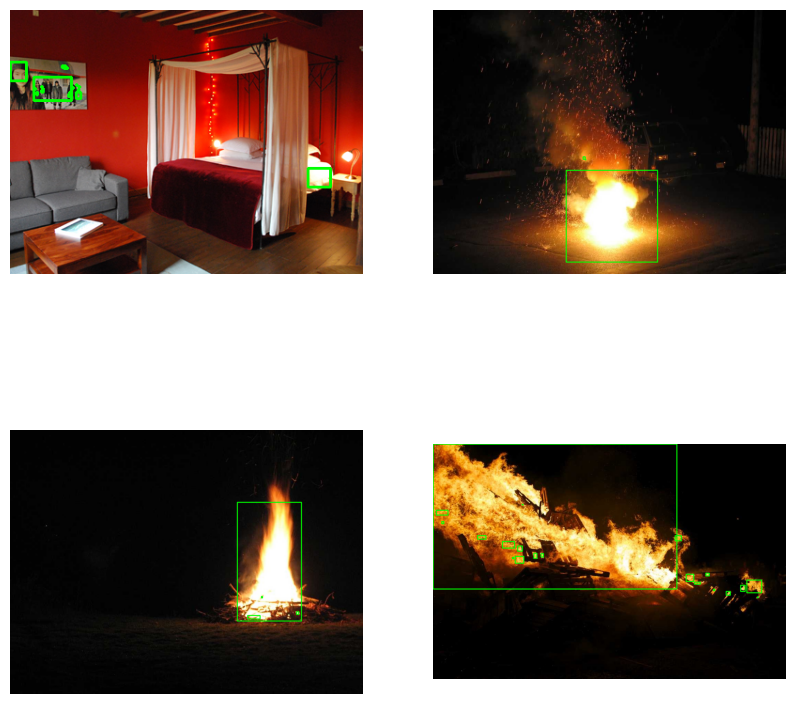

In [ ]:


fig, axs = plt.subplots(2, 2, figsize=(10,10))

for i, image_path in enumerate(true_image_paths):
    # Load the image
    frame = cv2.imread(image_path)

    blur = cv2.GaussianBlur(frame, (21, 21), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

    lower = [18, 50, 50]
    upper = [35, 255, 255]
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    mask = cv2.inRange(hsv, lower, upper)

    output = cv2.bitwise_and(frame, frame, mask=mask)

    no_red = cv2.countNonZero(mask)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display image in a subplot
    ax = axs[i // 2, i % 2]
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax.axis('off')

plt.show()